<a href="https://colab.research.google.com/github/garridoeduardo1000-afk/Simulacion-2-Eduardo-Gonzalez-/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

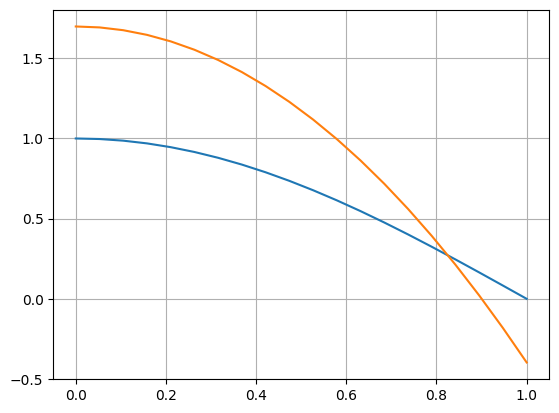

In [1]:
#muestreo importancia
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import time
def f(x):
  f=np.cos ((x*np.pi)/2)
  return f
def g(x):
  g= (24/(24-np.pi ** 2)) * (1-((np.pi ** 2 )*(x ** 2))/8)
  return g

xx = np.linspace(0,1,20)
plt.plot(xx,f(xx))
plt.plot(xx,g(xx))
plt.grid()


In [2]:
def muestra_g(n):
	c = 24 / (24 - np.pi ** 2)
	lista = []
	for i in range (n):
		u = rd.random()
		w = rd.uniform(0,c)
		if w <= g(u):
			lista.append(u)
	return lista

In [3]:
M = muestra_g(1000)

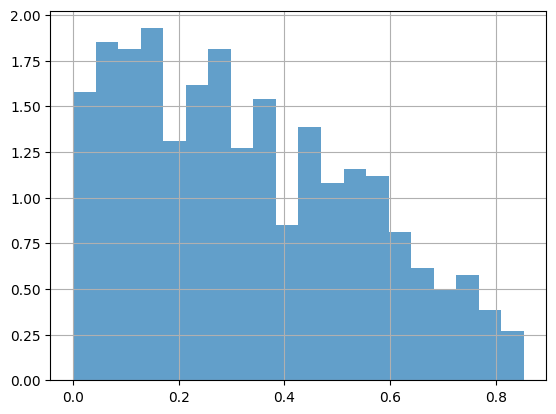

In [4]:
plt.hist(M, bins=20, density=True, alpha=0.7, label='Muestras ~ g(x)')
plt.grid()

In [11]:
def mc_crudo(N, n, func=g, a=0.0, b=1.0):
    thetas = []
    t0 = time.perf_counter()
    for _ in range(n):
        suma = 0.0
        for _ in range(N):
            u = rd.random()
            x = a + u * (b - a)
            suma += func(x)
        theta2 = (b - a) / N * suma
        thetas.append(theta2)
    t1 = time.perf_counter()
    tiempo_promedio = (t1 - t0) / n
    return np.mean(thetas), np.var(thetas), tiempo_promedio

In [18]:
def mc_importancia(N,n):
  t0 = time.perf_counter()
  thetas = []
  for _ in range(n):
    X = muestra_g(N)
    valores = [f(xi) / g(xi) for xi in X]
    thetas.append(np.mean(valores))
  t1 = time.perf_counter()
  tiempo_promedio = (t1 - t0) / n
  return np.mean(thetas), np.var(thetas), tiempo_promedio


N=1000
n=200

mean_crudo, var_crudo, tiempo_crudo = mc_crudo(N, n)
mean_importancia, var_importancia, tiempo_importancia = mc_importancia(N,n)


print("crudo:media =", mean_crudo, " varianza =", var_crudo, " tiempo =", tiempo_crudo)
print("crudo con la red de var:   media =", mean_importancia, " varianza =", var_importancia, " tiempo =", tiempo_importancia)


crudo:media = 1.000751253086747  varianza = 0.00045869120088255414  tiempo = 0.0011099799950000033
crudo con la red de var:   media = 0.6168955929850538  varianza = 4.8308119551258784e-05  tiempo = 0.0031975516500000367


In [12]:
reduccion=((var_crudo - var_importancia)/var_crudo)*100
print("Reduccion de la varianza: ", reduccion, "%")

Reduccion de la varianza:  90.3919935335169 %
